In [2]:
import numpy as npy

In [3]:
import pandas as pds

In [4]:
import matplotlib.pyplot as plot

In [5]:
import seaborn as sns

In [6]:
import matplotlib as matplot

In [7]:
newdataframe = pds.read_csv("C:/Users/Trupti/Desktop/HR_comma_sep.csv")
pds.set_option('display.max_rows', 14999)
print(newdataframe)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [8]:
#Check for null values
newdataframe.isnull().any()
 # This dataset has no missing values. On further investigation, we also see that there is inappropriate values. Neither any bad data which needs to be removed or imputed.


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [9]:
# We are predicting the employees more probable to leave the company. Hence our predictor variable is the column named 'Left'. We create another dataframe response with the column 'left'.

response = newdataframe["left"]
newdataframe.drop(labels=["left"], axis =1, inplace = True )
newdataframe.insert(0,"left", response)

newdataframe.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [10]:
#Assess the dimensions of the dataset
newdataframe.shape

(14999, 10)

In [11]:
#Check for ratio of employees who left Vs. who stayed 
Attrition_ratio = newdataframe.left.value_counts()/len(newdataframe)
Attrition_ratio

0    0.761917
1    0.238083
Name: left, dtype: float64

Text(0,0.5,'Employee Count')

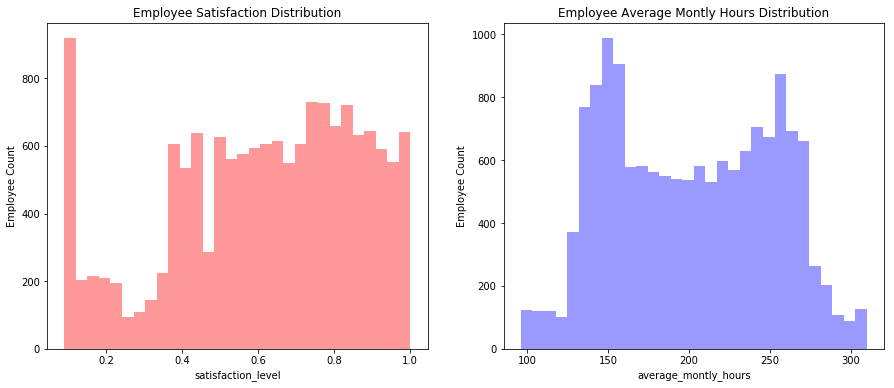

In [12]:
# Study of data distribution
%matplotlib inline
#Since we are aiming to show a variety over distribution, I choose to show distribution of Employee Satisfaction and Employee Salary distribution
# Set up the distribution plots
f, axes = plot.subplots(ncols=2, figsize=(15, 6))
# Graph Employee Satisfaction Plot
sns.distplot(newdataframe.satisfaction_level, kde=False, color="r", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')
sns.distplot(newdataframe.average_montly_hours, kde=False, color="b", ax=axes[1]).set_title('Employee Average Montly Hours Distribution')
axes[1].set_ylabel('Employee Count')

In [13]:
#Check datatype for columns to decide how we want to show our plots
newdataframe.dtypes

left                       int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [14]:
#Statistical Summary 
newdataframe.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [15]:
#Overview of Statistical Summary of employees who stayed Vs. who Left 
Attrition_Summary = newdataframe.groupby("left")
Attrition_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


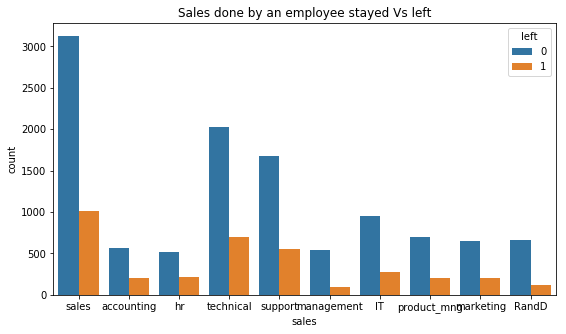

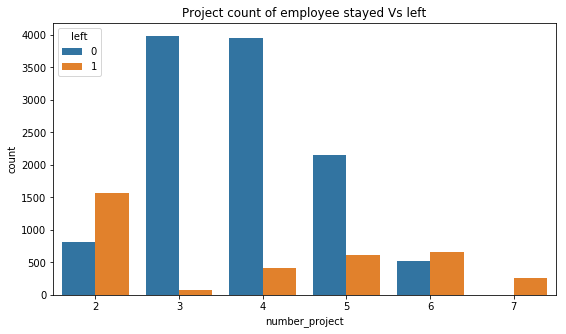

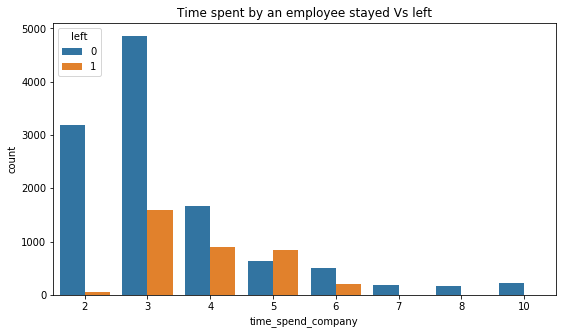

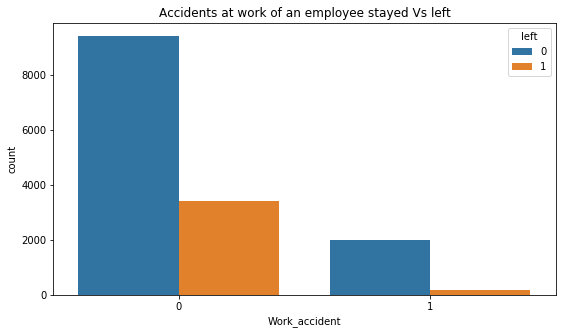

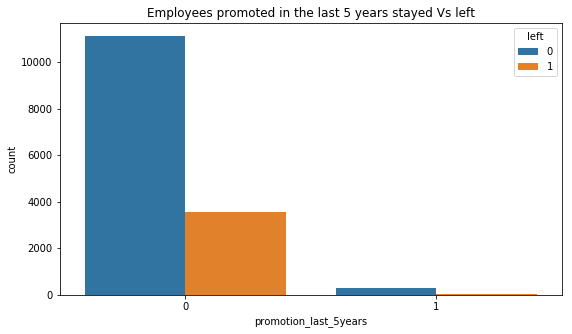

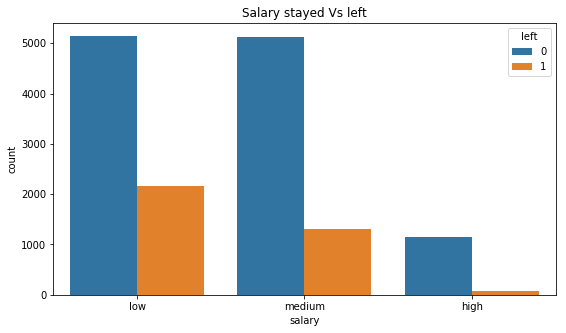

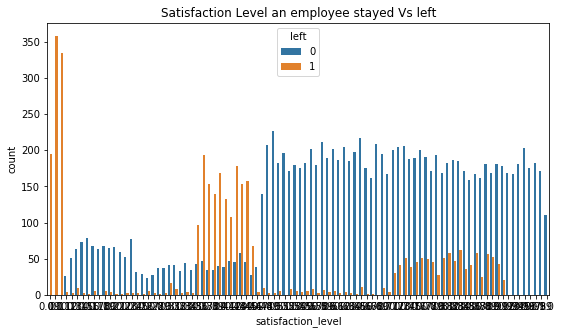

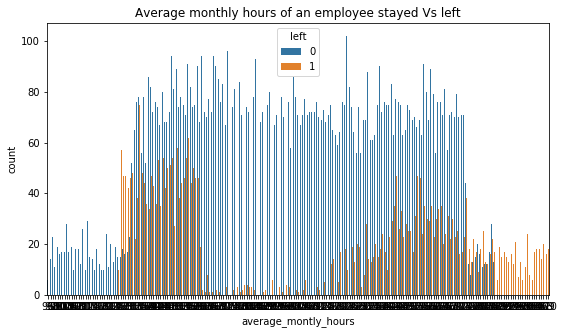

In [18]:
#Plot each column against the response variable Left

# Left Vs. Sales
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='sales',data=newdataframe,hue='left');
plot.title('Sales done by an employee stayed Vs left');

# Left Vs. Project Count
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='number_project',data=newdataframe,hue='left');
plot.title('Project count of employee stayed Vs left');

# Left Vs. Time spent in the company
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='time_spend_company',data=newdataframe,hue='left');
plot.title('Time spent by an employee stayed Vs left');

# Left Vs. Work Accidents
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='Work_accident',data=newdataframe,hue='left');
plot.title('Accidents at work of an employee stayed Vs left');

# Left Vs. Promoted employees in the last 5 years
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='promotion_last_5years',data=newdataframe,hue='left');
plot.title('Employees promoted in the last 5 years stayed Vs left');

# Left Vs. Salary group
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='salary',data=newdataframe,hue='left');
plot.title('Salary stayed Vs left');

# Left Vs. 
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='satisfaction_level',data=newdataframe,hue='left');
plot.title('Satisfaction Level an employee stayed Vs left');

# Left Vs. Average monthly hours
fig,ax= plot.subplots(figsize=(9,5))
sns.countplot(x='average_montly_hours',data=newdataframe,hue='left');
plot.title('Average monthly hours of an employee stayed Vs left');

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


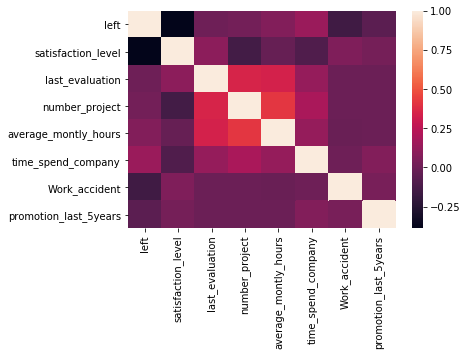

In [17]:
#Drawing a correlation matrix to assess how the columns are related
cor_mat = newdataframe.corr()
cor_mat = (cor_mat)
sns.heatmap(cor_mat, 
            xticklabels=cor_mat.columns.values,
            yticklabels=cor_mat.columns.values)

cor_mat

In [ ]:
#By comparing the correlation matrix study and the plots, we are able to conclude the below :
#Employees who left are the ones who have spent less time with the company
#Employees who have been promoted in the past 5 years have stayed back
#Employees leaving the company are the ones who have worked on 2, 6 or 7 projects
#Attrition rate is higher in the people with lower income
# The people from Sales tend to leave at a higher rate than the people in management.
#There are lot of people working in the company. But the attrition spikes in the 5th year

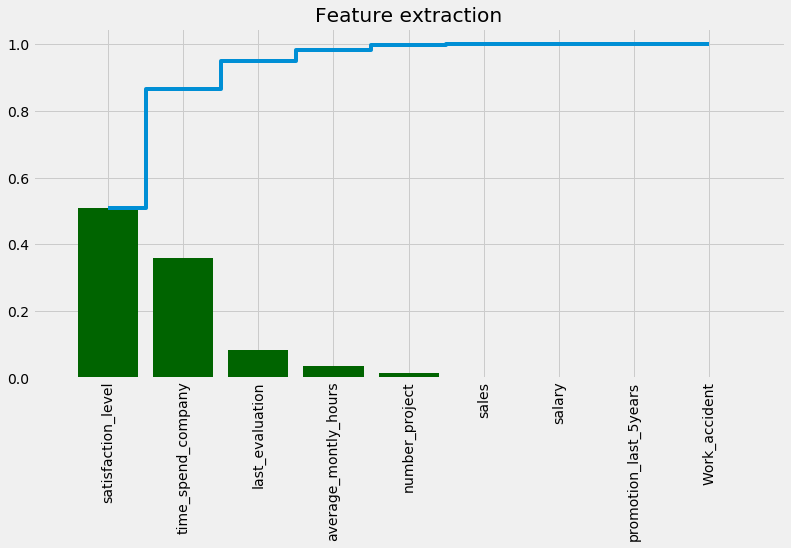

In [29]:
# Feature Extraction and Modelling
# Since our dataset has many independent variables in order to correctly predict, we are required to extract the features which will add more value and provide us more correct prediction.
import numpy as npy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plot.style.use('fivethirtyeight')
plot.rcParams['figure.figsize'] = (10,5)

# Convert these variables into categorical variables
newdataframe["sales"] = newdataframe["sales"].astype('category').cat.codes
newdataframe["salary"] = newdataframe["salary"].astype('category').cat.codes

#Create test and train data
target_name = 'left'
X= newdataframe.drop('left', axis=1)
Y= newdataframe[target_name]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.10, random_state = 123, stratify=Y)

decisionTree = tree.DecisionTreeClassifier(
class_weight = "balanced",
 min_weight_fraction_leaf=0.01   
)
decisionTree = decisionTree.fit(X_train,Y_train)

### plot the features ##
feature_extraction = decisionTree.feature_importances_
feat_names = newdataframe.drop(['left'],axis=1).columns


indices = npy.argsort(feature_extraction)[::-1]
plot.figure(figsize=(12,6))
plot.title("Feature extraction")
plot.bar(range(len(indices)), feature_extraction[indices], color = 'darkgreen',align="center")
plot.step(range(len(indices)), npy.cumsum(feature_extraction[indices]), where='mid', label='Cumulative')
plot.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plot.xlim([-1, len(indices)])
plot.show()


In [42]:
#from the above we confirm that, satisfaction level, time spent in the company, last evaluation, average monthly hours and project count factor in as major reasons why employees leave the company.

#For Modelling, I will be randomly choosing two machine learning algorithms and comparing the accuracy for the two to decide the best between the two 

# Decision Tree Modeling
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

decisionTree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
decisionTree = decisionTree.fit(X_train,Y_train)
print ("Decision Tree Model")
print(classification_report(Y_test, decisionTree.predict(X_test)))
decisionTree_roc_auc = roc_auc_score(Y_test, decisionTree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % decisionTree_roc_auc)

Decision Tree Model
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1143
          1       0.91      0.90      0.91       357

avg / total       0.96      0.96      0.96      1500

Decision Tree AUC = 0.94


In [40]:
#Logistic Regression Modeling
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(class_weight = "balanced")
logReg.fit(X_train, Y_train)
print ("Logistic Regression")
print(classification_report(Y_test, logReg.predict(X_test)))
logReg_roc_auc = roc_auc_score(Y_test, logReg.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % logReg_roc_auc)

Logistic Regression
             precision    recall  f1-score   support

          0       0.91      0.74      0.82      1143
          1       0.48      0.77      0.59       357

avg / total       0.81      0.75      0.77      1500

Logistic AUC = 0.76


In [ ]:
# Upon comparing the two, we notice that the accuracy for Decision Tree is better and hence modelling with Decision Tree will give us better output.
# Learning from the feature extraction, grades the top 5 reasons for employees to leave the company. This can be used to improvise the employee experience in a company to reduce attrition.
